In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
# Drop month day and year
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
# Encoding

df['Classes'] = np.where(df['Classes'].str.contains("not fire"), 0, 1)


In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [11]:
df['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [12]:
# Independent and Dependent features

X = df.drop('FWI', axis = 1)
y = df['FWI']

In [13]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [14]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [15]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [16]:
X_train.shape, X_test.shape

((183, 11), (61, 11))

In [17]:
# Feature selection based on correlation

X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.658995,-0.251013,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.514061,0.251823
RH,-0.658995,1.000000,0.230683,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.444177,-0.399453
Ws,-0.251013,0.230683,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.076230,-0.235841
Rain,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550
Classes,0.514061,-0.444177,-0.076230,-0.380854,0.778048,0.570181,0.486240,0.738717,0.571518,1.000000,0.192316


<Axes: >

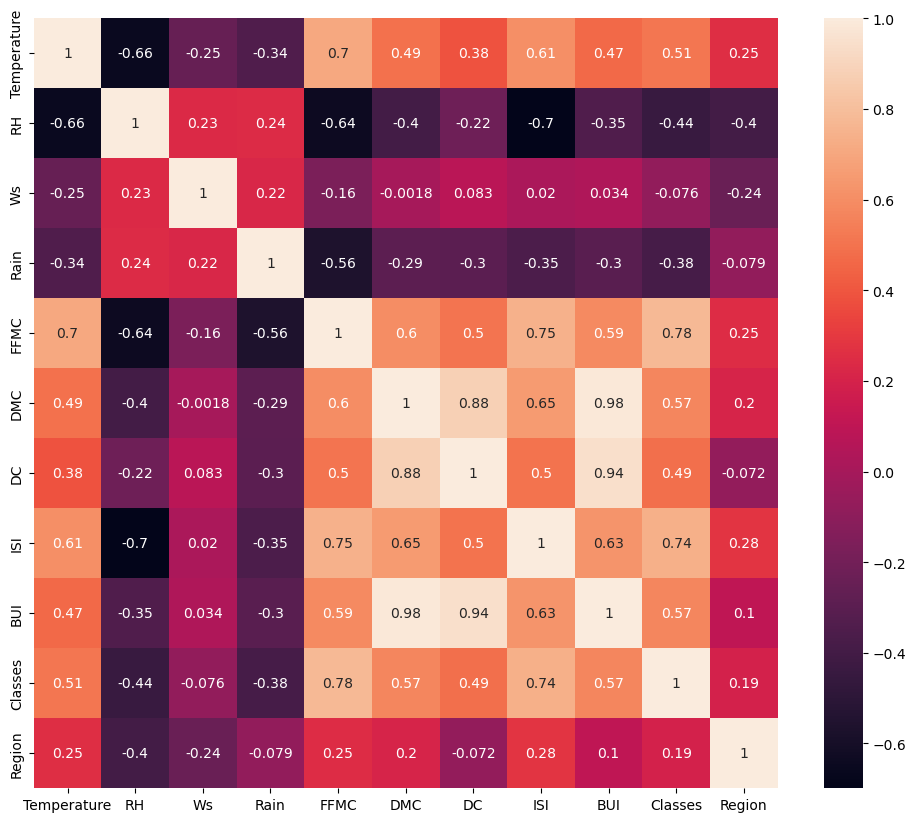

In [18]:
# Check for multicollinearity
plt.figure(figsize = (12, 10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)


In [19]:
def correlation(dataset, threshold):
    col_corr =  set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr 

In [20]:
# Threshold -- Domain Expertise

correlation_features = correlation(X_train, 0.85)

In [39]:
correlation_features

{'BUI', 'DC'}

In [21]:
# Drop features when correlation is more than 0.85
X_train.drop(correlation_features, axis = 1, inplace = True)
X_test.drop(correlation_features, axis = 1, inplace = True)
X_train.shape, X_test.shape

((183, 9), (61, 9))

In [22]:
# Feature Scaling or Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
X_train_scaled

array([[-0.80879747,  0.16240659,  1.27764568, ..., -0.78605505,
        -1.14736903, -1.00547949],
       [ 1.07839663, -0.45196291,  0.15791126, ...,  0.83114678,
         0.87155917,  0.99455037],
       [-0.26959916,  0.64024954, -0.58857835, ..., -0.23089621,
         0.87155917,  0.99455037],
       ...,
       [-1.88719411,  0.91330265,  0.53115607, ..., -1.09984047,
        -1.14736903, -1.00547949],
       [ 0.26959916, -0.38369963,  0.15791126, ...,  0.46908667,
         0.87155917,  0.99455037],
       [-0.53919832,  0.98156593,  2.02413529, ..., -0.88260441,
        -1.14736903, -1.00547949]], shape=(183, 9))

Text(0.5, 1.0, 'X_train after Scaling')

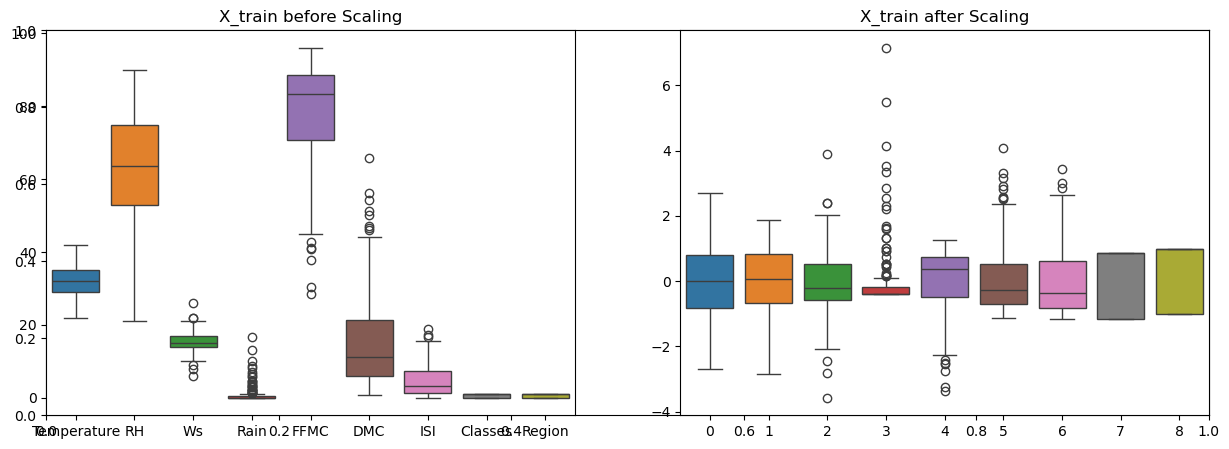

In [24]:
# Boxplot to understand effect of standard scaler

plt.subplots(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = X_train)
plt.title('X_train before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data = X_train_scaled)
plt.title('X_train after Scaling')

Linear Regression Model

Mean Absolute Error: 0.558261775808111
R2 Score: 0.9904793491964209


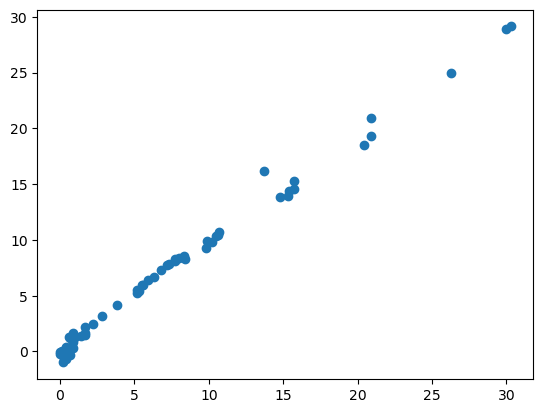

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# 0. Drop samples where y_train or y_test contains NaN
train_mask = ~np.isnan(y_train)
X_train = X_train[train_mask]
y_train = y_train[train_mask]

test_mask = ~np.isnan(y_test)
X_test = X_test[test_mask]
y_test = y_test[test_mask]

# 1. Impute missing values in X_train and X_test
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# 2. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train the Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# 4. Predict and evaluate
y_predict = linear_regression.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)

print('Mean Absolute Error:', mae)
print('R2 Score:', score)

plt.scatter(y_test, y_predict)

Mean Absolute Error 1.2009588195210423
R2 Score 0.9524527732478382


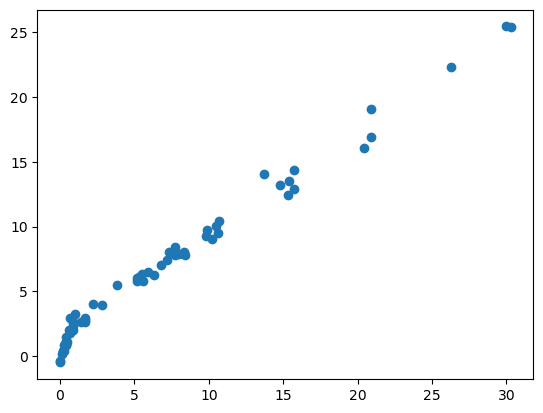

In [26]:
# Lasso Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)
y_predict = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_predict)


Mean Absolute Error 0.5817689455816336
R2 Score 0.9899204530197757


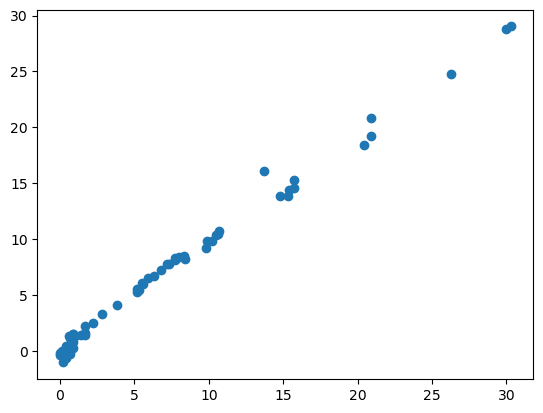

In [27]:
# Ridge Regression Model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled, y_train)
y_predict = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_predict)


Mean Absolute Error 1.8834341316496779
R2 Score 0.8817308972093679


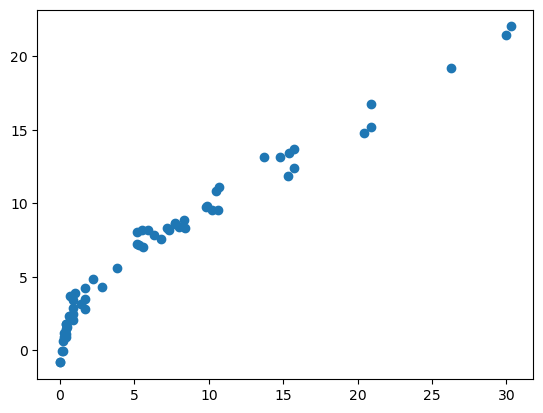

In [28]:
# ElasticNet Regression Model

from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic_net = ElasticNet()
elastic_net.fit(X_train_scaled, y_train)
y_predict = elastic_net.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absolute Error", mae)
print("R2 Score", score)
plt.scatter(y_test, y_predict)


In [29]:
# Cross Validation Lasso

from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv = 5)
lassocv.fit(X_train_scaled, y_train)


LassoCV(cv=5)

In [30]:
lassocv.predict(X_test_scaled)

array([ 8.25709589,  7.74894776, -0.41324915,  6.26655842, 13.89413825,
        1.39274883, 10.66198594, -0.93728568,  1.78893259, -0.40132188,
        0.50320521,  4.29123766,  1.77518641,  1.52164077, 18.35390786,
        5.49080401, 24.88665829, -0.33996144,  7.36115769, -0.57931869,
        1.72856343,  0.19778239,  8.1045321 ,  0.18685644, 20.92945832,
       -0.106085  ,  5.95140307,  9.82691042,  5.4306808 ,  9.89214982,
        8.49459537, -0.55694312, 10.41678576, 14.49310728,  1.47630449,
        1.50954926,  0.96511279,  5.90586325, -0.27344287, -0.4072184 ,
        6.57036544,  0.46888783,  3.19940401, -0.5357807 , 15.29555381,
        8.41640252,  8.44276388,  1.34281591, 10.23659532,  9.26890218,
       28.919159  ,  2.19874535,  7.96601726, 19.30111964, 13.83083638,
       16.077231  , 28.78626387, -0.20019638,  2.51559284, 14.31923003,
        5.21400992])

In [31]:
lassocv.alpha_

np.float64(0.02525482784545446)

In [32]:
lassocv.alphas_

array([6.70790397, 6.25581369, 5.83419279, 5.44098772, 5.07428336,
       4.73229364, 4.41335289, 4.11590768, 3.83850927, 3.5798066 ,
       3.33853961, 3.11353322, 2.9036915 , 2.70799241, 2.52548278,
       2.3552737 , 2.19653613, 2.04849695, 1.91043511, 1.78167818,
       1.66159903, 1.54961282, 1.4451741 , 1.3477742 , 1.25693873,
       1.17222527, 1.09322121, 1.01954176, 0.95082806, 0.88674543,
       0.82698175, 0.77124595, 0.71926656, 0.6707904 , 0.62558137,
       0.58341928, 0.54409877, 0.50742834, 0.47322936, 0.44133529,
       0.41159077, 0.38385093, 0.35798066, 0.33385396, 0.31135332,
       0.29036915, 0.27079924, 0.25254828, 0.23552737, 0.21965361,
       0.20484969, 0.19104351, 0.17816782, 0.1661599 , 0.15496128,
       0.14451741, 0.13477742, 0.12569387, 0.11722253, 0.10932212,
       0.10195418, 0.09508281, 0.08867454, 0.08269818, 0.0771246 ,
       0.07192666, 0.06707904, 0.06255814, 0.05834193, 0.05440988,
       0.05074283, 0.04732294, 0.04413353, 0.04115908, 0.03838

In [33]:
lassocv.mse_path_

array([[55.39021024, 46.25565519, 57.94323695, 73.35065386, 34.011204  ],
       [49.92749295, 41.28003652, 54.85400342, 70.104321  , 29.82688671],
       [45.11329955, 36.42399336, 47.87917666, 64.04065371, 26.31863376],
       [40.27077183, 32.17803854, 41.75584685, 58.67360623, 22.6718448 ],
       [35.58175865, 28.46422485, 36.43219527, 53.91872308, 19.4566859 ],
       [31.47794066, 25.21466084, 31.80407791, 49.70212595, 16.73613407],
       [27.88469237, 22.37016797, 27.78068454, 45.95916453, 14.4404905 ],
       [24.73712613, 19.87922148, 24.28312072, 41.39622199, 12.50939493],
       [21.97844653, 17.69691409, 21.2426574 , 36.59231396, 10.89145263],
       [19.55990493, 15.78413174, 18.59988096, 32.39035276,  9.54147719],
       [17.43825861, 14.10672157, 16.30277165, 28.71381903,  8.42070849],
       [15.57605793, 12.63497234, 14.30620869, 25.49506959,  7.49569508],
       [13.9406489 , 11.34296077, 12.57095494, 22.67721372,  6.73758503],
       [12.50355397, 10.20808186, 11.0

Mean Absolute Error 0.5940443818052903
R2 Score 0.9897108549149912


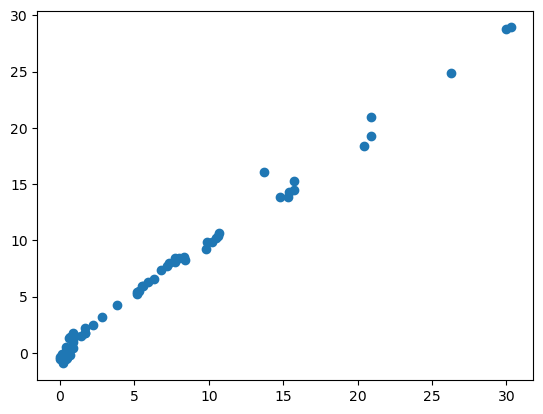

In [34]:
y_predict = lassocv.predict(X_test_scaled)
plt.scatter(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absolute Error", mae)
print("R2 Score", score)

Mean Absolute Error 32.71793832014593
R2 Score -34.696653585885045


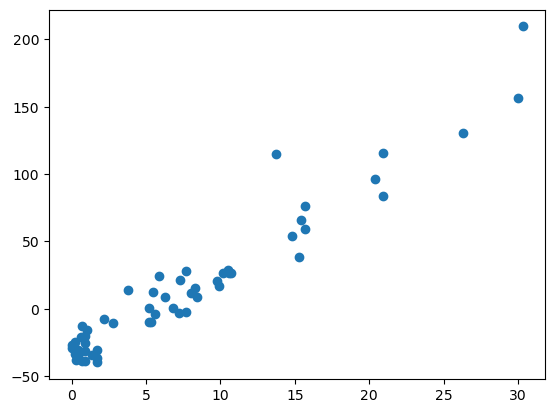

In [35]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv = 5)
ridgecv.fit(X_train_scaled, y_train)
y_predict = ridgecv.predict(X_test)
plt.scatter(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print('Mean Absolute Error', mae)
print('R2 Score', score)

In [36]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

Mean Absolute Error 0.5817689455816336
R2 Score 0.9899204530197757


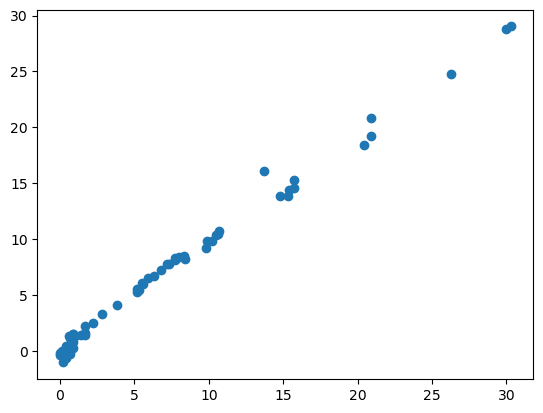

In [37]:
from sklearn.linear_model import ElasticNetCV
elastic_net_cv = ElasticNetCV(cv = 5)
elastic_net_cv.fit(X_train_scaled, y_train)
y_predict = ridgecv.predict(X_test_scaled)
plt.scatter(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
score = r2_score(y_test, y_predict)
print("Mean Absolute Error", mae)
print("R2 Score", score)

In [38]:
elastic_net_cv.alphas_

array([13.41580794, 12.51162739, 11.66838558, 10.88197544, 10.14856672,
        9.46458729,  8.82670578,  8.23181535,  7.67701855,  7.15961319,
        6.67707923,  6.22706643,  5.807383  ,  5.41598482,  5.05096557,
        4.71054739,  4.39307227,  4.0969939 ,  3.82087022,  3.56335636,
        3.32319806,  3.09922564,  2.8903482 ,  2.69554841,  2.51387747,
        2.34445054,  2.18644242,  2.03908352,  1.90165611,  1.77349086,
        1.65396351,  1.5424919 ,  1.43853311,  1.34158079,  1.25116274,
        1.16683856,  1.08819754,  1.01485667,  0.94645873,  0.88267058,
        0.82318154,  0.76770185,  0.71596132,  0.66770792,  0.62270664,
        0.5807383 ,  0.54159848,  0.50509656,  0.47105474,  0.43930723,
        0.40969939,  0.38208702,  0.35633564,  0.33231981,  0.30992256,
        0.28903482,  0.26955484,  0.25138775,  0.23444505,  0.21864424,
        0.20390835,  0.19016561,  0.17734909,  0.16539635,  0.15424919,
        0.14385331,  0.13415808,  0.12511627,  0.11668386,  0.10

In [40]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))
pickle.dump(ridge, open('ridge.pkl', 'wb'))